In [5]:
#!pip download lifelines
#%pip install input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
#%pip install input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
#%pip install input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
#%pip install input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
#%pip install input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl

Processing c:\users\clark\documents\projects\cibmtr\input\pip-install-lifelines\autograd-1.7.0-py3-none-any.whl
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.
Processing c:\users\clark\documents\projects\cibmtr\input\pip-install-lifelines\autograd-gamma-0.5.0.tar.gz
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp310-cp310-win_amd64.whl (44.8 MB)
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=3c5291c6b8e050c

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import numpy as np
from tqdm import tqdm

import lightgbm as lgb
from scipy.stats import rankdata 
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, StratifiedKFold
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
train = pd.read_csv('input/data/train.csv')
test = pd.read_csv('input/data/test.csv')
sample = pd.read_csv('input/data/sample_submission.csv')

train_solution=train[['ID','efs','efs_time','race_group']].copy()

train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [3]:
# set analysis output directory
def create_output_directory(output_path):
    """Create the output directory if it doesn't exist and set plotting style."""
    os.makedirs(output_path, exist_ok=True)
    return output_path

output_path = 'working/analysis'
create_output_directory(output_path)

'working/analysis'

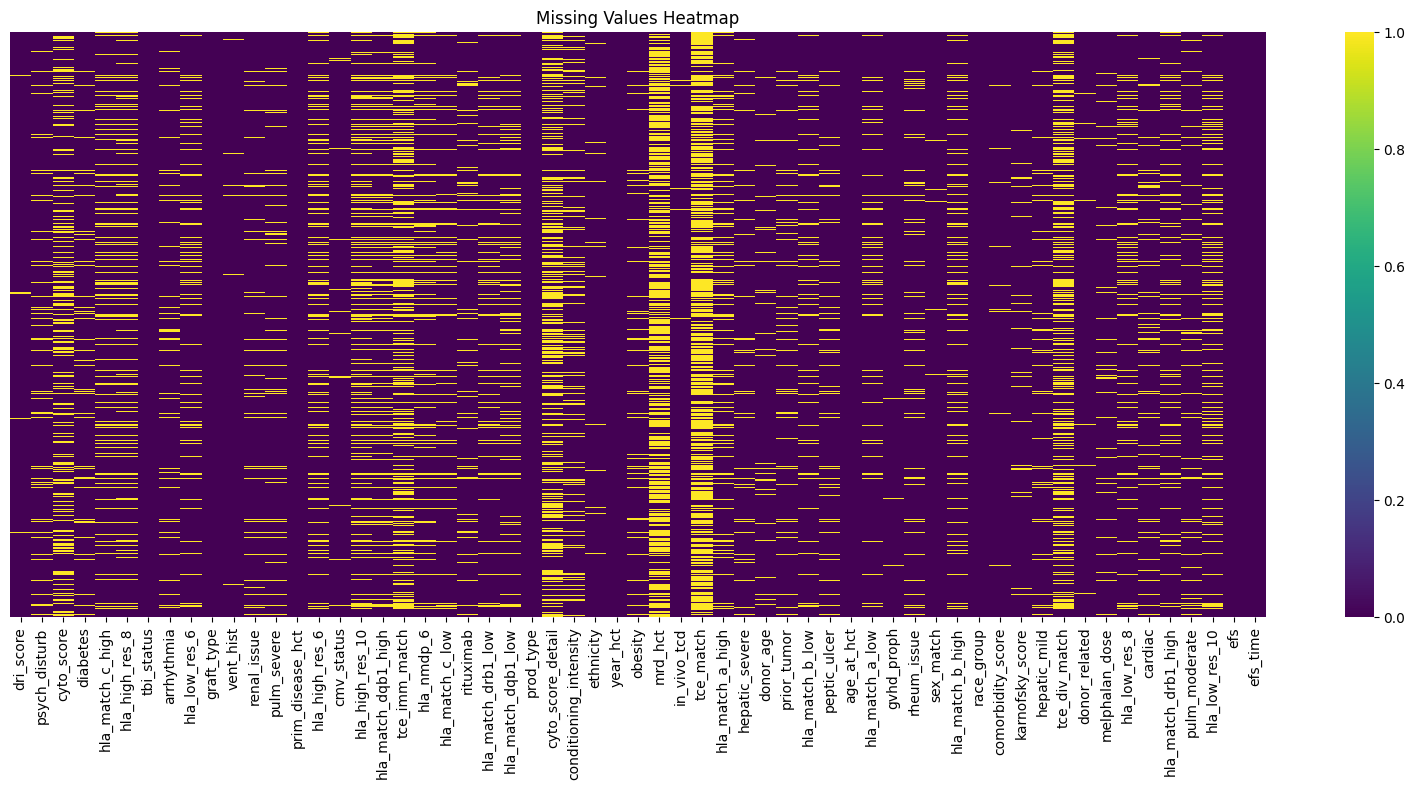

In [4]:
# missing values heatmap
def plot_missing_values_heatmap(df, output_path):
    plt.figure(figsize=(16, 8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.savefig(f'{output_path}/missing_values_heatmap.png')
    plt.show()
    plt.close()

plot_missing_values_heatmap(train, output_path)